![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **k-Means-Clustering (mit `sklearn`)**
    - **Daten erzeugen**
    - **Aufgabe 1: Modell trainieren**
    - **Aufgabe 2: Visualisierung**
    - **Aufgabe 3: Punkte vorhersagen**
    - **Aufgabe 4: Der optimale Wert für k**
    - **Aufgabe 5: Noise**
    - **Aufgabe 6: Implementierung des k-Means Algorithmus**
    


# k-Means-Clustering (mit `sklearn`)

In dieser Aufgabe wollen wir die Anwendung des **k-Means-Clustering** mit `sklearn` üben.

## Daten erzeugen

Wir wollen in dieser Aufgabe mit **synthetischen** Daten arbeiten. 

Die folgenden Zellen erzeugen 100 Datenpunkte mit jeweils zwei Features und speichert sie in der Variable `X`.
Hierfür benutzen wir die Funktion [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) aus `sklearn`. Diese Funktion kann synthetische Daten erzeugen. Wir geben dafür an, dass wir 2 Features (`n_features`) haben möchten und $3$ "Blobs".

In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='whitegrid')    


d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Daten'}, xlabel='Features 1', ylabel='Features 2'>

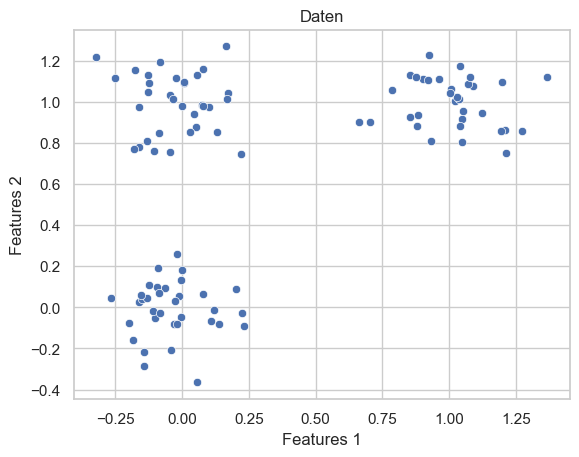

In [2]:
# Das Rauschen der Daten
noise = 0.13

# Die Anzahl der Datenpunkte
N = 100


# Erzeugt N Datenpunkte mit je 2 Features und 3 "Blobs" 
# Abhängig vom Rauschen sind die Daten mehr oder weniger um
# die "centers" gestreut.
X, y = make_blobs(n_samples = N,     
                  centers = [[0,0], [1,1], [0,1]],    
                  cluster_std = [noise, noise, noise], 
                  n_features = 2,
                  random_state = 33)

# Daten darstellen
plt.title("Daten"); plt.xlabel("Features 1"); plt.ylabel("Features 2")
sns.scatterplot(x=X[:, 0], y=X[:, 1])

Es sollten recht deutlich drei verschiedene Cluster erkennbar sein. 

Wir wollen nun versuchen ein Modell zu **trainieren**, welches in der Lage ist, diese Cluster _ohne_ die Labels `y` zu identifizieren $\Longrightarrow$ **_Unsupervised Learning_**

## Aufgabe 1: Modell trainieren

- Erstelle ein [k-Means-Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Modell in der Variable `kmeans`. Wähle als $k=3$, d.h. beim Erstellen des Modells muss als Argument `n_clusters=3` angegeben werden.

- Trainiere das Modell auf den obigen Daten `X`. Verwende dazu die Funktion [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) von `kmeans`.

In [14]:
from sklearn.cluster import KMeans

# Schreibe deinen Code hier.

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

# Schreibe deinen Code hier.

d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Aufgabe 2: Visualisierung

Nachdem unser Modell trainiert ist, wollen wir uns das Ergebnis darstellen lassen. 

- In dem Attribut `kmeans.labels_` befinden sich die Klassenlabels für die $N$ Datenpunkte. 
- Erstelle wie oben ein Scatterplot der Daten, nur diesmal sollen alle Datenpunkte eines Clusters die gleiche Farbe bekommen. Verwende dazu den Parameter `hue` der [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) Funktion.
- In dem Attribut `kmeans.cluster_centers_` befinden sich die Mittelpunkte der 3 Clusters. 
- Lasse dir diese Positionen als ein Kreuz im gleichen Schaubild anzeigen. 


d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


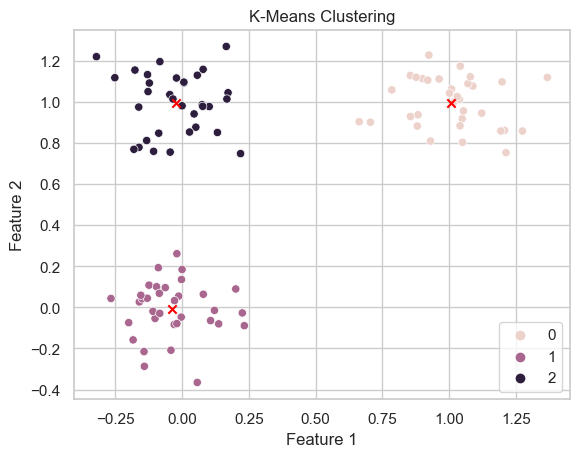

In [9]:
# Schreibe deinen Code hier.

plt.title("K-Means Clustering"); plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
plt.show()


# Schreibe deinen Code hier.

## Aufgabe 3: Punkte vorhersagen

- Wir wollen die Clusterzugehörigkeit folgender Punkte vorhersagen: 

\begin{array}{c|c} 
x & y \\ \hline  \hline 
0 & 0 \\ \hline
0 & 0.5 \\ \hline 
0 & 1.5 \\ \hline 
1 & 0 \\ \hline
\end{array}

- Überlege dir vorab (durch Betrachten des Scatterplots) zu welchem Cluster _du_ die einzelnen Punkte zählen würdest.

- Verwende die Funktion [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) des Modells `kmeans` um die Vorhersage des Modells für die Punkte zu betrachten. 

- Stimmen die Ergebnisse mit deiner Wahl überein? 


In [11]:
X_test = np.array([[0,0], [0, 0.5], [0, 1.5], [1,0]])

# Schreibe deinen Code hier.

## Punkt A : C1; B : C1; C : C2; D : C0

pred = kmeans.predict(X_test)
pred

## Punkt 2 ist ein Grenzfall - geschenkt. Ansonsten scheint das Modell zu funktionieren!
# Schreibe deinen Code hier.

array([1, 2, 2, 0])

## Aufgabe 4: Der optimale Wert für k

Oben haben wir angenommen, dass die Daten in 3 Cluster aufteilbar sind. Dies wissen wir im Allgemeinen *nicht* vorher. Wir wollen daher so tun, als ob wir das nicht wissen. 

- Trainiere für die Werte von $k=1,\dots,7$  **k-Means-Clustering** Modelle. 
- Speichere dir für jedes dieser Modelle den Fehler in einer Liste `errors`. 
- Lasse dir die Fehler plotten.

Du solltest das typische **Ellenbogen-Profil** erkennen. Das $k$ an dem die Kurve "abknickt" ist unser optimaler Wert für $k$. In diesem konkreten Fall sollte dieser Knick bei $k=3$ zu finden sein.

Den Fehler eines trainierten Modells findet sich in der Variable `kmeans.inertia_`. Dieser Fehler berechnet für *jeden* Punkt in `X` den quadratischen Abstand zum Clustermittelpunkt und addiert sie auf.

d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

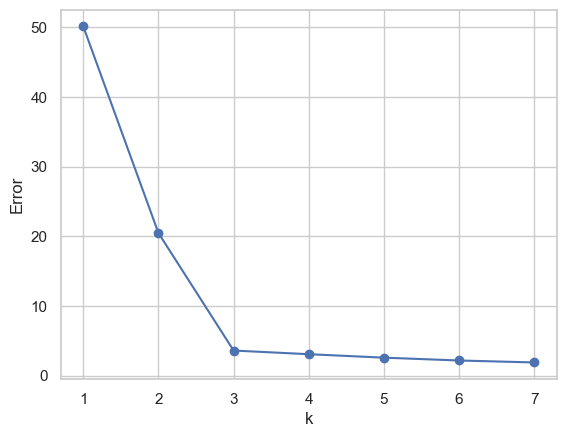

[50.104052110777666,
 20.46090909365219,
 3.603060309286252,
 3.0769880054531944,
 2.5802328022199963,
 2.174302555375825,
 1.8939674234758377]

In [13]:
errors = []
ks = range(1, 8)

# Schreibe deinen Code hier.

for i in ks:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)

# Schreibe deinen Code hier.

plt.plot(ks, errors,marker="o")
plt.xlabel("k")
plt.ylabel("Error")
plt.show()

errors

## Aufgabe 5: Noise 

- Experimentiere mit dem Wert von `noise` in der ersten Zelle bei der Erzeugung der Daten. 
- Je größer der Wert ist, desto "verrauschter" sind die Daten. Was ändert sich dadurch für das `kmeans` Modell?

d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\janni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

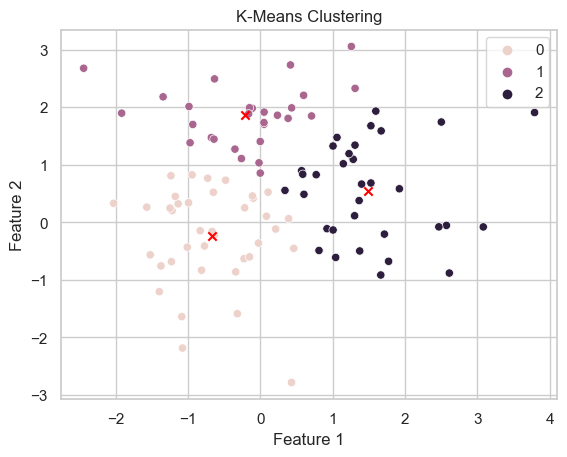

In [22]:
# Schreibe deinen Code hier.


# Das Rauschen der Daten
noise = 0.99

N = 100


# Erzeugt N Datenpunkte mit je 2 Features und 3 "Blobs" 
# Abhängig vom Rauschen sind die Daten mehr oder weniger um
# die "centers" gestreut.
X, y = make_blobs(n_samples = N,     
                  centers = [[0,0], [1,1], [0,1]],    
                  cluster_std = [noise, noise, noise], 
                  n_features = 2,
                  random_state = 33)


kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

plt.title("K-Means Clustering"); plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
plt.show()

## Die Standartabweichung der Clusterpunkte vom Clusterzentrum verändert sich. 

# Schreibe deinen Code hier.

## Aufgabe 6: Implementierung des k-Means Algorithmus

Die nächste Aufgabe besteht darin, den k-Means Algorithmus in seiner einfachsten Form selbst zu programmieren. Der Algorithmus soll in der Lage sein, Datenpunkte in 2D in $k$ Clustern zu gruppieren.

### Schritt 1: 

Initialisiere die Zentroide: Wähle $k$ Zentroide zufällig aus den Datenpunkten aus. Die Numpy Funktion [random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) kann hierbei hilfreich sein.

In [34]:
k = 3
# Schreibe dein Code hier.
import numpy as np


randoms = np.random.choice(len(X), k)

# Wählen Sie die Zentroide basierend auf diesen Indizes
centroids = X[randoms]
centroids

# Schreibe dein Code hier.

array([[-1.07403153, -2.18386558],
       [-2.44005095,  2.67671476],
       [ 1.40208718,  0.66448881]])

### Schritt 2:

Schreibe eine Funktion, die jeden Datenpunkt dem nächstgelegenen Zentroid zuordnet. Die Funktion erhält das Array $X$ und das Array mit den Zentroiden und gibt ein Array `closest_cluster` mit den zugeordneten Clustern zurück.

In [45]:
# Schreibe dein Code hier.

def compute_closest_cluster(X, centroids):
    closest_cluster = [0 for i in range(len(X))]
    for i, point in enumerate(X):
        distances = np.sqrt(np.sum((point - centroids)**2, axis=1))
        closest_cluster[i] =  min((point, i) for i, point in enumerate(distances))[1]
    
    return closest_cluster
    

# Schreibe dein Code hier.

Du kannst deinen Code testen, indem du folgenden Code ausführst:

In [46]:
X_test = np.array([[1, 2], [5, 6], [8, 9], [12, 12], [9, 10]])
centroids_test = np.array([[1, 1], [8, 8], [10, 10]])

print(compute_closest_cluster(X_test, centroids_test)) # Erwartetes Ergebnis: [0 1 1 2 2]

[0, 1, 1, 2, 2]


### Schritt 3: 

Schreibe eine Funktion, die für jedes Cluster das arithmetische Mittel der zugeordneten Datenpunkte berechnet und die neuen Zentroide zurückgibt.

In [47]:
closest_cluster = compute_closest_cluster(X, centroids)


def compute_centroids(X, closest_cluster, k):
    new_centroids = []
    
    for i in range(k):
        points_in_cluster = [X[j] for j in range(len(X)) if closest_cluster[j] == i]
        if points_in_cluster:
            centroid = [sum(dim)/len(points_in_cluster) for dim in zip(*points_in_cluster)]
            new_centroids.append(centroid)
        else:
            new_centroids.append(None)

    return new_centroids

# Schreibe dein Code hier.

Du kannst deinen Code testen, indem du folgenden Code ausführst:

In [48]:
X_test = np.array([[1, 2], [5, 6], [8, 9], [12, 12], [9, 10]])
closest_cluster_test = np.array([0, 1, 1, 2, 2])
k_test = 3

print(compute_centroids(X_test, closest_cluster_test, k_test))
# Erwartetes Ergebnis:
#[[1.  2. ]
# [6.5 7.5]
# [10.5 11.]]

[[1.0, 2.0], [6.5, 7.5], [10.5, 11.0]]


### Schritt 4: 

Nun haben wir alles, um **k-Means** selbst zu programmieren! Das heißt, wiederhole die Schritte 2 und 3, bis sich die Zentroide nicht mehr signifikant ändern oder eine maximale Anzahl von Iterationen erreicht ist. Schreibe dafür eine Schleife mit `max_iters = 100` und berechne die Clusterzuordnung. Anschließend visualisiere deine Ergebnisse.

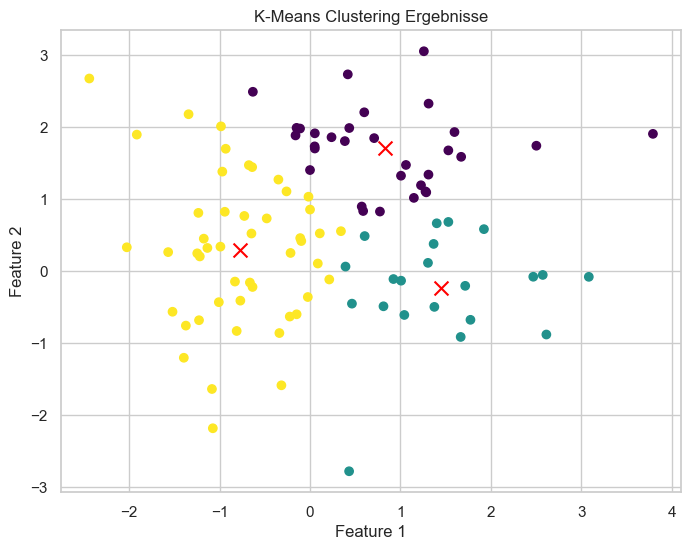

In [51]:
max_iters = 100

# Schreibe dein Code hier.

def k_means_clustering(X, k, iters):

    randoms = np.random.choice(len(X), k)
    centroids = X[randoms]
    for i in range(iters):
        closest_cluster = compute_closest_cluster(X, centroids)
        new_centroids = compute_centroids(X, closest_cluster, k)
        centroids = new_centroids

    return centroids, closest_cluster

final_centroids, final_clusters = k_means_clustering(X, 3, max_iters)




# Visualisierung der Ergebnisse
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_clusters, cmap='viridis', marker='o')
plt.scatter([c[0] for c in final_centroids], [c[1] for c in final_centroids], c='red', marker='x', s=100)
plt.title("K-Means Clustering Ergebnisse")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
    
# Schreibe dein Code hier.